In [ ]:
import numpy as np

import tensorflow as tf 

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
from keras import layers
import keras
import datetime, os

import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:

x_train_set = np.empty((50000,32,32))
for idx, image in enumerate(x_train):
    grey_img = np.dot(image, [0.299, 0.587, 0.114])
    #x_train[idx] = np.squeeze(image axis = 2)
    #x_train[idx] = grey_img
    x_train_set[idx] =grey_img 

print(grey_img.shape)

(32, 32)


In [ ]:

x_test_set = np.empty((10000,32,32))
for idx, image in enumerate(x_test):
    grey_img = np.dot(image, [0.299, 0.587, 0.114])
    #x_train[idx] = np.squeeze(image axis = 2)
    #x_train[idx] = grey_img
    x_test_set[idx] =grey_img 
print(grey_img.shape)
print(x_test_set.shape)

(32, 32)
(10000, 32, 32)


In [ ]:
'''
x_train_set = np.squeeze(x_train_set, axis = 2)
print(x_train_set.shape)
print(y_train.shape)

x_test_set = np.squeeze(x_test_set, axis = 2)
print(x_test_set.shape)
print(y_test.shape)
'''

'\nx_train_set = np.squeeze(x_train_set, axis = 2)\nprint(x_train_set.shape)\nprint(y_train.shape)\n\nx_test_set = np.squeeze(x_test_set, axis = 2)\nprint(x_test_set.shape)\nprint(y_test.shape)\n'

In [ ]:
model = Sequential()
#input_shape=(500000,1024)
input_shape = keras.Input(shape=(32, 32, 1))

encod = []
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_shape)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
#x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
#x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same', name = 'encoded')(x)


#encod.append(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding= 'same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)




autoencoder = keras.Model(input_shape, x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

layer_name = 'encoded'
intermediate_layer_model = keras.Model(inputs = autoencoder.input, outputs=autoencoder.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_train_set)



Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 8, 8, 8)           1160

In [ ]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_set, x_train_set,
                epochs=80,
                batch_size=64,
                shuffle=True,
                callbacks=[TensorBoard(log_dir='/logs/autoencoder')],
                validation_data=(x_test_set, x_test_set))

Epoch 1/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5939 - val_loss: 0.5928
Epoch 2/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5912 - val_loss: 0.5910
Epoch 3/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5894 - val_loss: 0.5895
Epoch 4/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5882 - val_loss: 0.5888
Epoch 5/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5874 - val_loss: 0.5885
Epoch 6/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5869 - val_loss: 0.5874
Epoch 7/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5865 - val_loss: 0.5870
Epoch 8/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5862 - val_loss: 0.5868
Epoch 9/80
782/782 [==============================] - 11s 14ms/step - loss: 0.5859 - val_loss: 0.5869
Epoch 10/80
782/782 [==============================] - 11s 14ms/step - loss: 0.585

In [ ]:
print(type(intermediate_output))
print(len(intermediate_output))
print(intermediate_output[1].shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
50000
(4, 4, 8)


In [ ]:
autoencoder.save('/content/autoencoder/history')

INFO:tensorflow:Assets written to: /content/autoencoder/history/assets


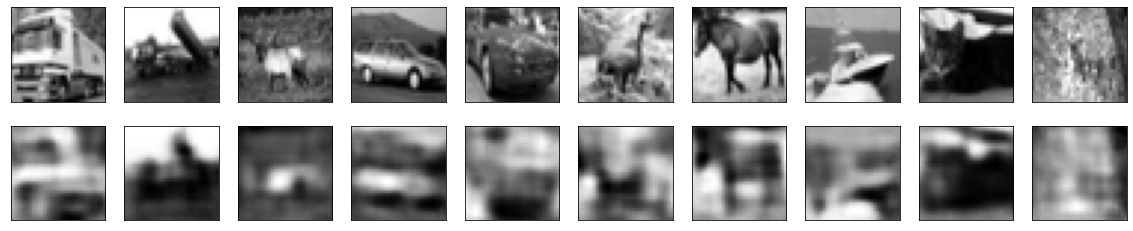

In [ ]:
decoded_imgs = autoencoder.predict(x_train_set)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train_set[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Plot
'''
#Accuracy
plt.figure(figsize=(15, 10))
plt.plot(autoencoder.history.saved_model)
plt.plot(autoencoder.history['val_accuracy'])
plt.title('{} Hidden Layer: Training and Testing Loss'.format(hidden_layers))
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

#Loss
plt.figure(figsize=(15, 10))
plt.plot(autoencoder.history['loss'])
plt.plot(autoencoder.history['val_loss'])
plt.title('{} Hidden Layer: Training and Testing Loss'.format(hidden_layers))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

In [41]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans

In [48]:

encoded = np.array([encoded_output.numpy().reshape(128,1).squeeze(axis = 1) for encoded_output in intermediate_output]) 

In [49]:
encoded.shape

(50000, 128)

In [50]:

model = KMeans(n_clusters=10, init='random',
               n_init=10, max_iter=100, random_state=5)



preds = model.fit_predict(encoded)



In [52]:
print('Davies Bouldin score: {}'.format(davies_bouldin_score(encoded, preds)))
print('ASC score: {}'.format(silhouette_score(encoded, preds)))

Davies Bouldin score: 1.9696987360948324
ASC score: 0.09903354197740555
